### Importando as bibliotecas necessárias



In [487]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Lendo o arquivo com os dados

In [488]:
dados = pd.read_excel('./Dados de estudantes da UFV - 2022-12-12.ods')
dados

KeyboardInterrupt: 

### Verificando as 5 primeiras linhas do DataFrame

In [608]:
dados.head()

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9


### Informação sobre o conteúdo dos dados

In [ ]:
dados.info()

### Descrição dos dados

In [ ]:
dados.describe()

### Verificando a quantidade de dados nulos em cada coluna

In [ ]:
dados.isnull().sum()

### Verificando valores únicos e contagem para cada atributo

In [ ]:
for coluna in dados.columns:
    print(f"\n{coluna}\nVariedade: {dados[coluna].nunique()}\nDados: \n{dados[coluna].value_counts()}\n")

### Copiando os dados para um novo DataFrame

In [643]:
df = dados.copy()

### Tratamento da coluna 'Ano Nascimento'
- **Dados da coluna**
    - Descrição dos dados
- ***Outliers***
    - Verificação de *outliers*
    - Remoção de *outliers*
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos
- **Tipo de dado**
    - Atualização do tipo de dado para *int*
- **Distribuição dos dados**
    - Relevante para uma análise inicial

#### Dados da coluna
    - Descrição dos dados

In [644]:
df['Ano_Nascimento'].describe()

count    73949.000000
mean      1990.876442
std          8.366123
min       1900.000000
25%       1986.000000
50%       1992.000000
75%       1997.000000
max       2022.000000
Name: Ano_Nascimento, dtype: float64

#### Outliers
    - Através do gráfico de caixa (boxplot) é possível verificar a presença de outliers

<Axes: xlabel='Ano_Nascimento'>

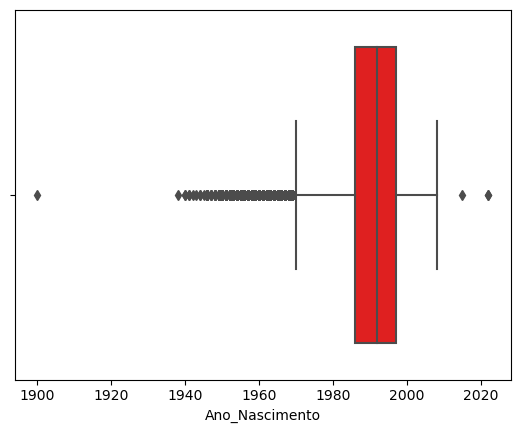

In [645]:
sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Remoção de outliers
    - Para a remoção, foi considerado outliers, valores acima de 2005 e abaixo de 1930

Quantidade de outliers menores que 1930: 1
Quantidade de outliers maiores que 2005: 4
Outliers removidos!


<Axes: xlabel='Ano_Nascimento'>

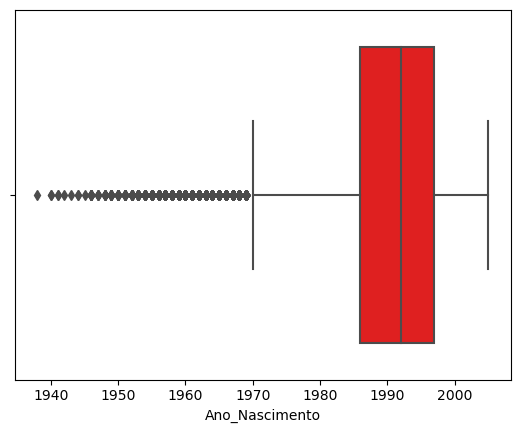

In [646]:
print(f"Quantidade de outliers menores que 1930: {df[df['Ano_Nascimento'] < 1930]['Ano_Nascimento'].count()}")
print(f"Quantidade de outliers maiores que 2005: {df[df['Ano_Nascimento'] > 2005]['Ano_Nascimento'].count()}")

df = df.drop(df[df['Ano_Nascimento'] < 1930].index)
df = df.drop(df[df['Ano_Nascimento'] > 2005].index)
print(f"Outliers removidos!")

sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Valores nulos
    - Através da verificação de valores nulos, foi encontrado alguns valores nulos

In [647]:
print(f"Quantidade de valores nulos: {df['Ano_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 77


#### Tratamento de valores nulos
    - Para o tratamento de valores nulos, foi utilizado a média dos valores da coluna

In [648]:
df['Ano_Nascimento'].fillna(df['Ano_Nascimento'].mean(), inplace=True)
print(f"Quantidade de valores nulos: {df['Ano_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 0


#### Tipo de dado
    - Substuituídos por inteiros

In [649]:
df['Ano_Nascimento'] = df['Ano_Nascimento'].astype(int)

#### Distribuição dos dados
    - Ideal para uma análise inicial


<Axes: xlabel='Ano_Nascimento', ylabel='Count'>

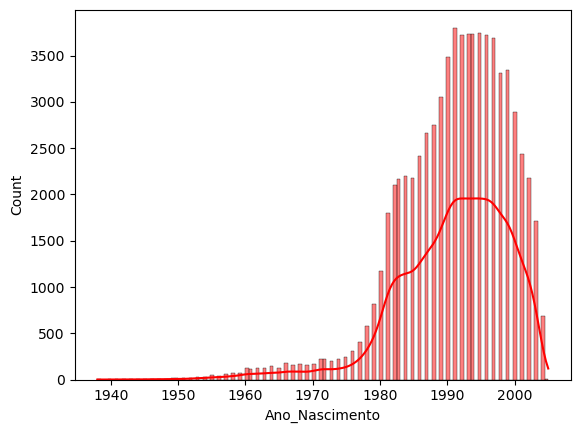

In [650]:
sns.histplot(x=df['Ano_Nascimento'], color='red', kde=True)

In [651]:

df['Ano_Nascimento'] = df['Ano_Nascimento'].astype(int)

### Tratamento da coluna 'Sexo'
- **Dados da coluna**
     - Descrição dos dados
     - Gráfico de contagem
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos


#### Dados da coluna
    - Descrição dos dados
    - Gráfico de contagem

In [652]:
df['Sexo'].describe()

count     73981
unique        2
top           F
freq      37030
Name: Sexo, dtype: object

In [653]:
df['Sexo'].value_counts()

F    37030
M    36951
Name: Sexo, dtype: int64

<Axes: xlabel='Sexo', ylabel='count'>

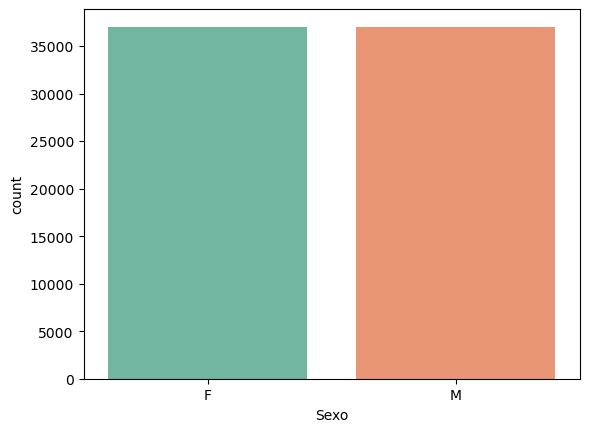

In [654]:
sns.countplot(x=df['Sexo'], color='red', data=df, order=df['Sexo'].value_counts().index, orient='v', palette='Set2')

#### Valores nulos
    - Valores nulos foram inicialmente substituidos por 'N/A

In [655]:
print(f"Quantidade de valores nulos: {df['Sexo'].isnull().sum()}")

Quantidade de valores nulos: 40


In [656]:
df['Sexo'].fillna('N/A', inplace=True)
print(f"Quantidade de valores nulos: {df['Sexo'].isnull().sum()}")

df['Sexo'].value_counts().reset_index().rename(columns={'index': 'Sexo', 'Sexo': 'Quantidade'})

Quantidade de valores nulos: 0


,Sexo,Quantidade
0,F,37030
1,M,36951
2,N/A,40


### Tratamento da coluna 'Campus'
- **Dados da coluna**
    - Descrição dos dados
    - Gráfico de contagem
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos


#### Desscrição da coluna
    - Importante para verificar se possui valores sem sentido ou fora do padrão
    - Gráfico de contagem

In [657]:
df['Campus'].describe()

count     74021
unique        3
top         CAV
freq      60335
Name: Campus, dtype: object

In [658]:
df['Campus'].value_counts()

CAV    60335
CRP     8412
CAF     5274
Name: Campus, dtype: int64

<Axes: xlabel='Campus', ylabel='count'>

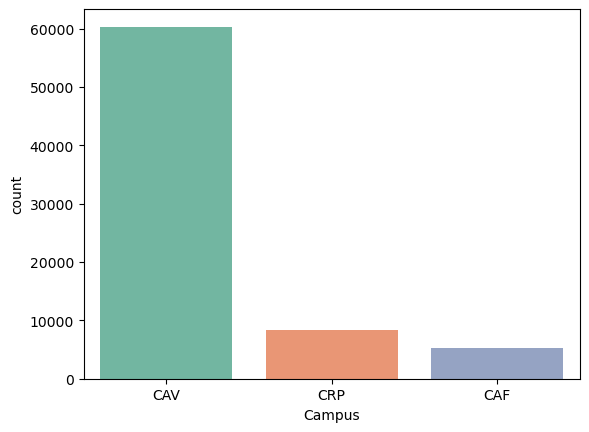

In [659]:
sns.countplot(x=df['Campus'], color='red', data=df, order=df['Campus'].value_counts().index, orient='v', palette='Set2')

#### Traamento de valores nulos
    - A coluna 'Campus' não possui valores nulos


In [660]:
print(f"Quantidade de valores nulos: {df['Campus'].isnull().sum()}")

Quantidade de valores nulos: 0


In [661]:
print("A coluna 'Campus' não possui valores nulos!")

A coluna 'Campus' não possui valores nulos!


### Tratamento da coluna 'Curso_Identificador'
- **Dados da coluna**
    - Descrição da coluna
    - Gráfico de contagem
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos
- **Valores irrelevantes**
    - Verificação de valores irrelevantes
    - Tratamento de valores irrelevantes

#### Dados da coluna
    - Descrição da coluna
    - Gráfico de contagem


In [662]:
df['Curso_Identificador'].value_counts().reset_index().rename(columns={'index': 'Curso_Identificador', 'Curso_Identificador': 'Quantidade'})

,Curso_Identificador,Quantidade
0,1103,5787
1,1121,1974
2,1113,1651
3,1132,1637
4,1114,1627
...,...,...
74,1424,243
75,1154,217
76,1418,205
77,2102,160


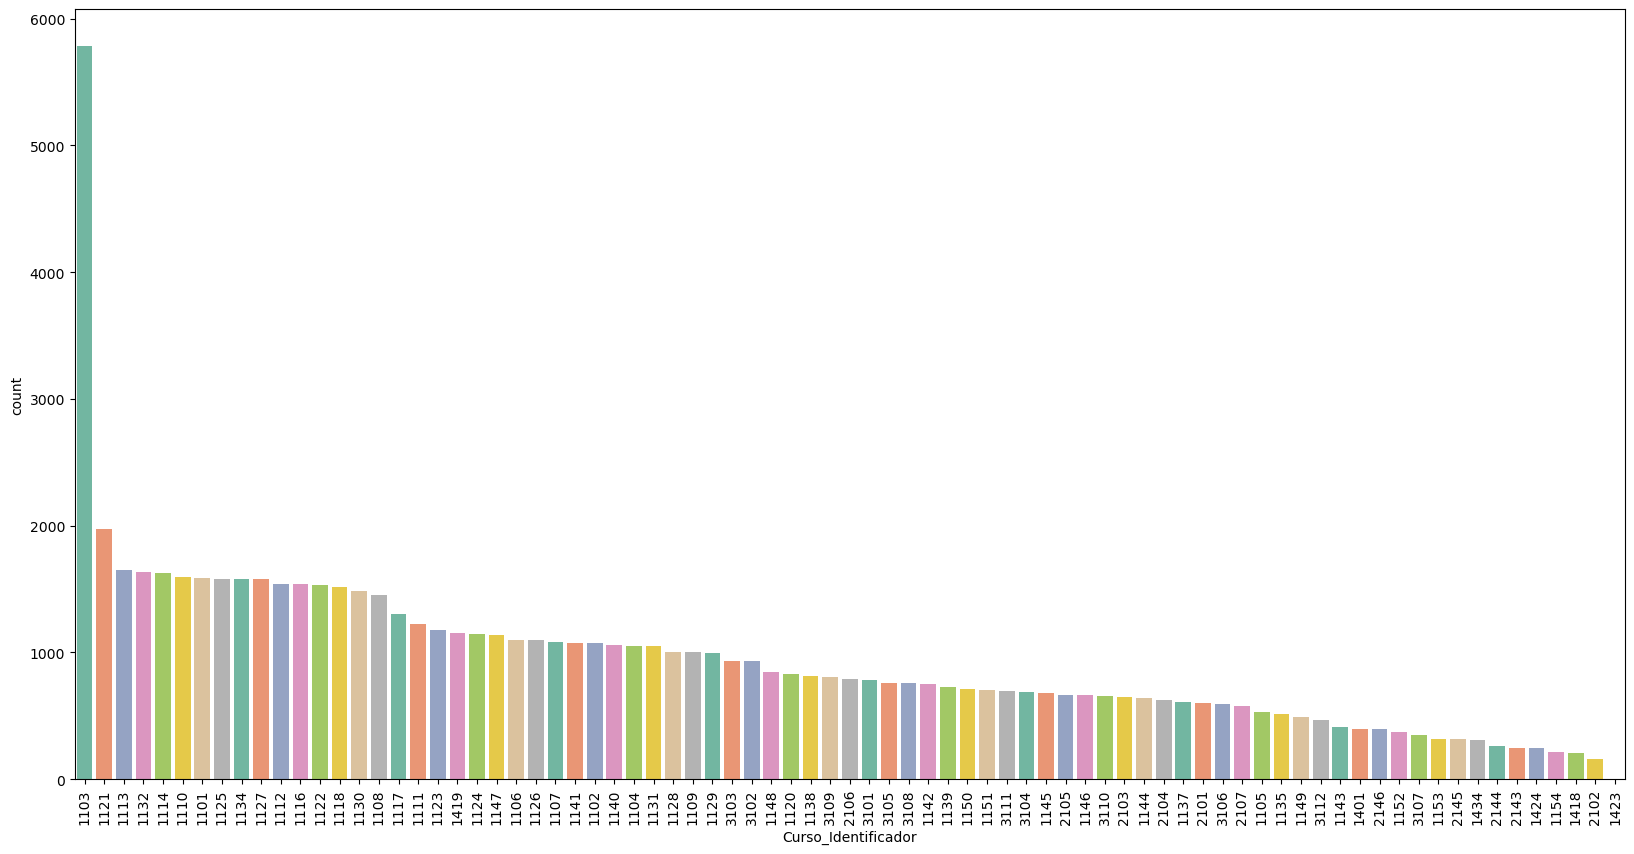

In [663]:
ccp = sns.countplot(x=df['Curso_Identificador'], color='red', data=df, order=df['Curso_Identificador'].value_counts().index,orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Valores nulos
    - Tratamento de valores nulos

In [664]:
qtdCursoIdentificadorNulos = df['Curso_Identificador'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdCursoIdentificadorNulos}")

Quantidade de valores nulos: 0


In [665]:
print("A coluna 'Curso_Identificador' não possui valores nulos!")

A coluna 'Curso_Identificador' não possui valores nulos!


#### Valores irrelevantes
    - Tratamento de valores irrelevantes

In [666]:
# Há um curso que possui apenas 1 aluno, então iremos remover esse aluno e o curso

df[df['Curso_Identificador'] == 1423]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
1553,20399,1970,M,CAV,1423,CAV - LICENCIATURA EM FISICA,MG,SAO JOAO DO PARAISO,2000/2,2003/1,C,Conclusão ...,Conclusão,NaN,NaN,0,Informação não disponível,75.0


In [667]:
df = df.drop(df[df['Curso_Identificador'] == 1423].index)
print("Curso removido!")

Curso removido!


### Tratamento da coluna 'Curso'
- **Dados da coluna**
    - Descrição da coluna
    - Gráfico de contagem
- **Nome dos cursos**
    - Tratamento dos nomes dos cursos
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos

#### Dados da coluna
    - Descrição da coluna
    - Gráfico de contagem

In [668]:
df['Curso'].describe()

count               74020
unique                 92
top       CAV - Agronomia
freq                 5787
Name: Curso, dtype: object

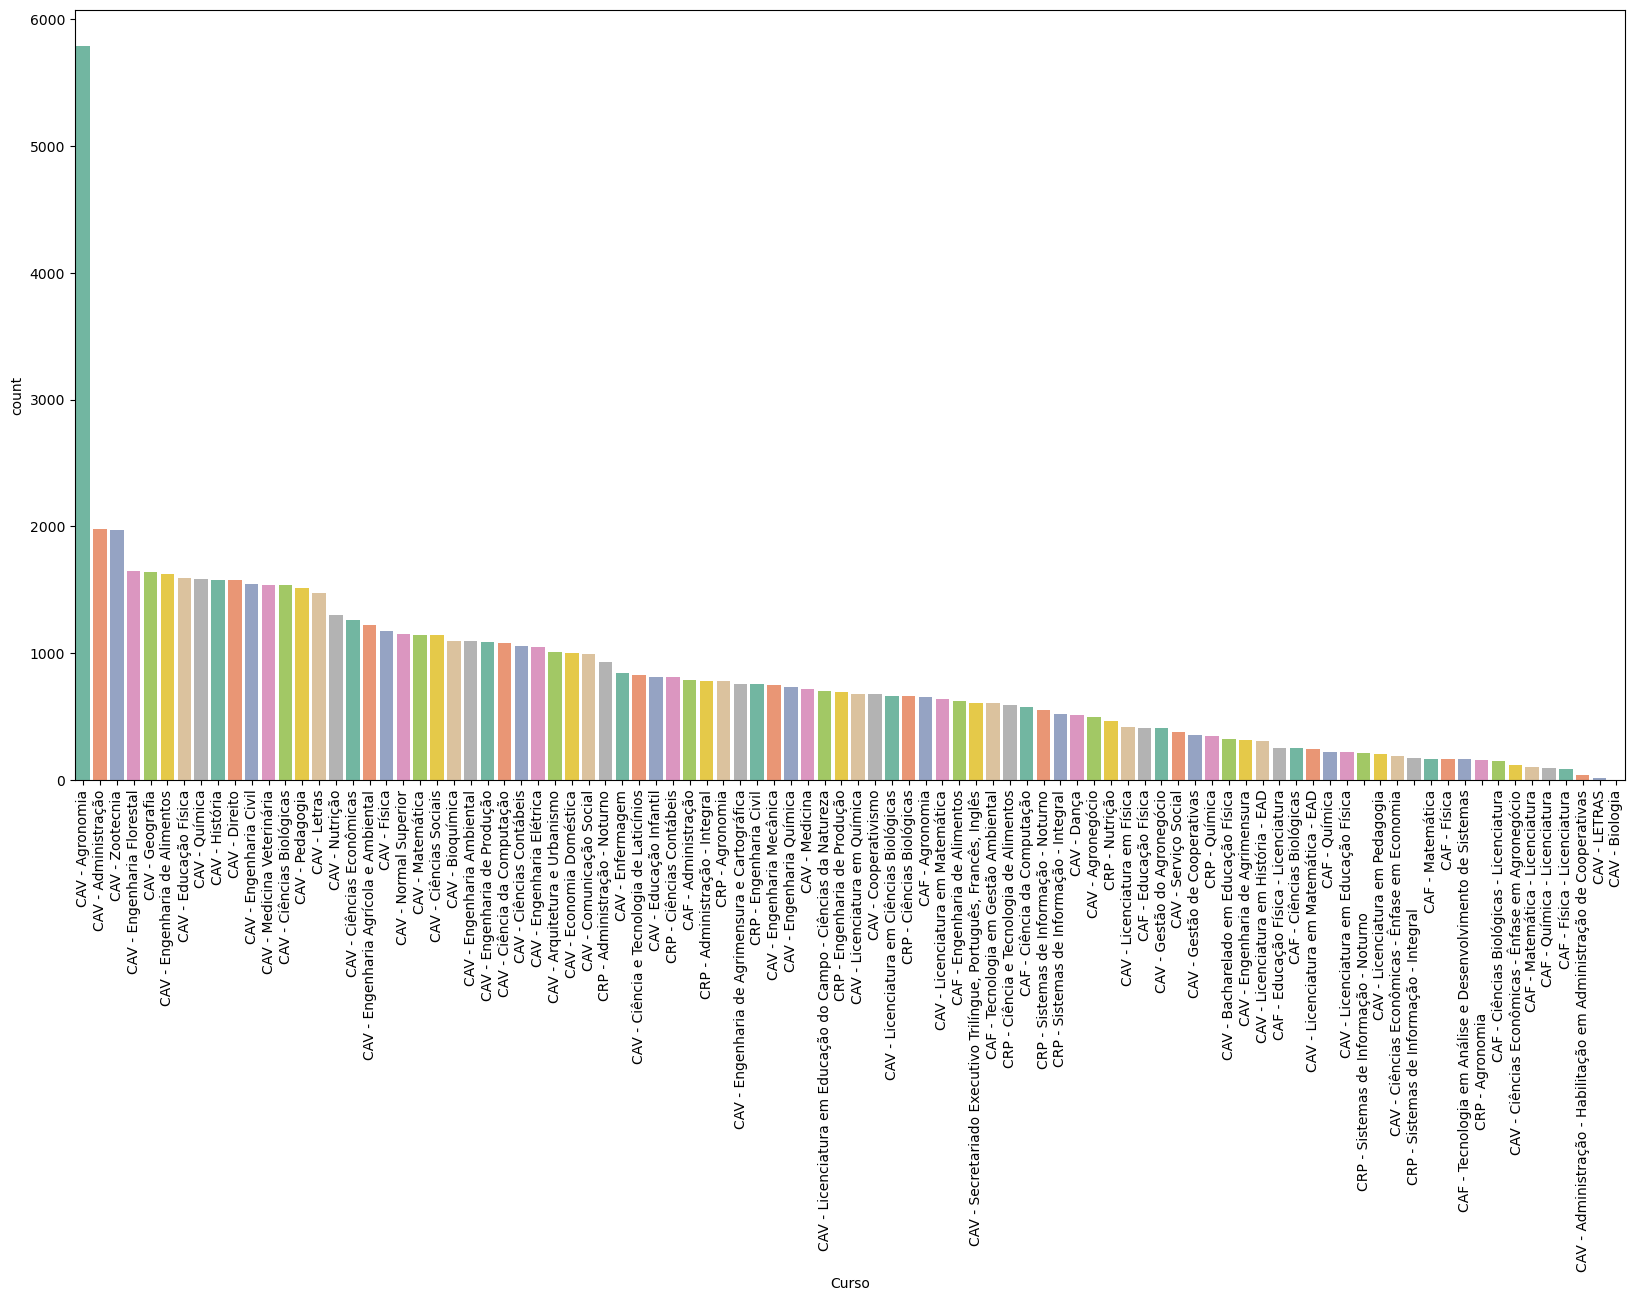

In [669]:
ccp= sns.countplot(x=df['Curso'], color='red', data=df, order=df['Curso'].value_counts().index, orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Nome dos cursos
    - Análise dos nomes dos cursos
    - Primeiramente foi criado um dicionário com os identificadores dos cursos e seus respectivos nomes para uma análise inicial
    - Após a análise inicial, os cursos e a quantidade de alunos por curso foram ordenados por ordem alfabética para facilitar a visualização dos dados
    - Por fim, alguns cursos foram tartados, removidos ou renomeados

In [670]:
dict(zip(df['Curso_Identificador'], df['Curso']))

{1101: 'CAV - Administração',
 1102: 'CAV - Engenharia de Agrimensura e Cartográfica',
 1103: 'CAV - Agronomia',
 1104: 'CAV - Ciências Contábeis',
 1105: 'CAV - Ciências Econômicas - Ênfase em Agronegócio',
 1106: 'CAV - Engenharia Ambiental',
 1107: 'CAV - Engenharia de Produção',
 1108: 'CAV - Ciências Econômicas',
 1109: 'CAV - Economia Doméstica',
 1110: 'CAV - Educação Física',
 1111: 'CAV - Engenharia Agrícola e Ambiental',
 1112: 'CAV - Engenharia Civil',
 1113: 'CAV - Engenharia Florestal',
 1114: 'CAV - Engenharia de Alimentos',
 1116: 'CAV - Medicina Veterinária',
 1117: 'CAV - Nutrição',
 1118: 'CAV - Pedagogia',
 1120: 'CAV - Ciência e Tecnologia de Laticínios',
 1122: 'CAV - Ciências Biológicas',
 1123: 'CAV - Física',
 1124: 'CAV - Matemática',
 1121: 'CAV - Zootecnia',
 1125: 'CAV - Química',
 1127: 'CAV - Direito',
 1128: 'CAV - Arquitetura e Urbanismo',
 1130: 'CAV - Letras',
 1137: 'CAV - Secretariado Executivo Trilíngue, Português, Francês, Inglês',
 1140: 'CAV - Co

In [671]:
df['Curso'].value_counts().sort_index().reset_index().rename(columns={'index': 'Curso', 'Curso': 'Quantidade'})

,Curso,Quantidade
0,CAF - Administração,790
1,CAF - Agronomia,651
2,CAF - Ciência da Computação,574
3,CAF - Ciências Biológicas,248
4,CAF - Ciências Biológicas - Licenciatura,145
...,...,...
87,CRP - Química,347
88,CRP - Sistemas de Informação - Integral,516
89,CRP - Sistemas de Informação - Integral ...,172
90,CRP - Sistemas de Informação - Noturno,548


In [672]:
# Há um curso com nome CAV - Biologia com apenas 1 aluno, então iremos remover esse aluno e o curso
df.drop(df[df['Curso'] == 'CAV - Biologia'].index, inplace=True)

# Há um curso com nome CAV - LETRAS com apenas 10 alunos, então iremos remover esse curso
df.drop(df[df['Curso'] == 'CAV - LETRAS'].index, inplace=True)

# Há um curso com nome CAV - Administração - Habilitação em Administração de Cooperativas com apenas 35 alunos, então iremos remover esse curso
df.drop(df[df['Curso'] == 'CAV - Administração - Habilitação em Administração de Cooperativas'].index, inplace=True)

#susbtituindo nome dos cursos que tem identificador: 3104 por 'CRP - Sistema de Informação - Integral'
df.loc[df['Curso_Identificador'] == 3104, 'Curso'] = 'CRP - Sistema de Informação - Integral'

#susbtituindo nome dos cursos que tem identificador: 3105 por 'CRP - Sistema de Informação - Noturno'
df.loc[df['Curso_Identificador'] == 3105, 'Curso'] = 'CRP - Sistema de Informação - Noturno'

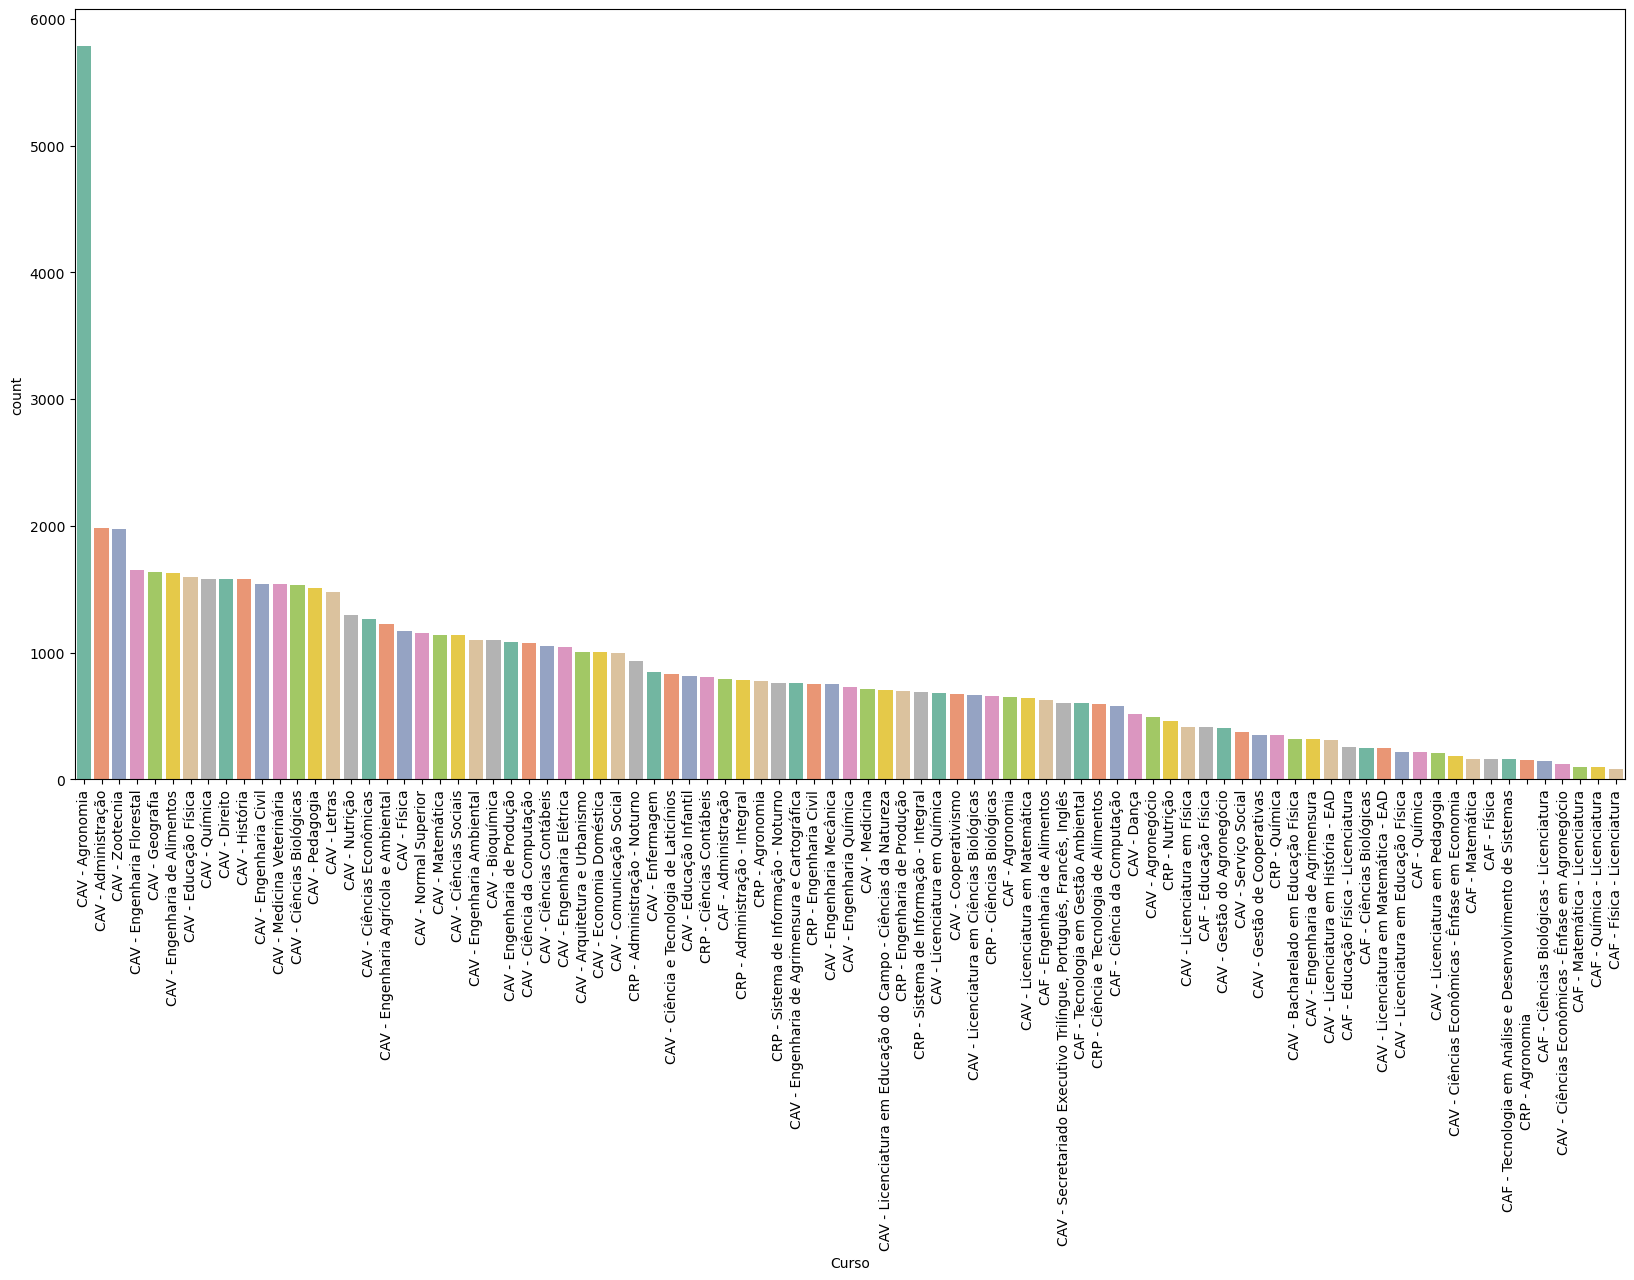

In [673]:
ccp = sns.countplot(x=df['Curso'], color='red', data=df, order=df['Curso'].value_counts().index, orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Valores nulos
    - Tratamento de valores nulos

In [674]:
print(f"Quantidade de valores nulos: {df['Curso'].isnull().sum()}")

Quantidade de valores nulos: 0


In [675]:
print("A coluna 'Curso' não possui valores nulos!")

A coluna 'Curso' não possui valores nulos!


### Tratamento da coluna 'UF_Nascimento'
- **Dados da coluna**
    - Descrição da coluna
    - Gráfico de contagem
- **Valores nulos**
    - Verificação de valores nulos
    - Tratamento de valores nulos
- **Valores errados**
    - Verificação de valores errados
    - Tratamento de valores errados

In [676]:
df['UF_Nascimento'].value_counts().reset_index().rename(columns={'index': 'UF_Nascimento', 'UF_Nascimento': 'Quantidade'})

,UF_Nascimento,Quantidade
0,MG,57293
1,SP,6412
2,RJ,3361
3,ES,3183
4,BA,1087
5,GO,508
6,DF,394
7,PR,294
8,PA,213
9,MT,177


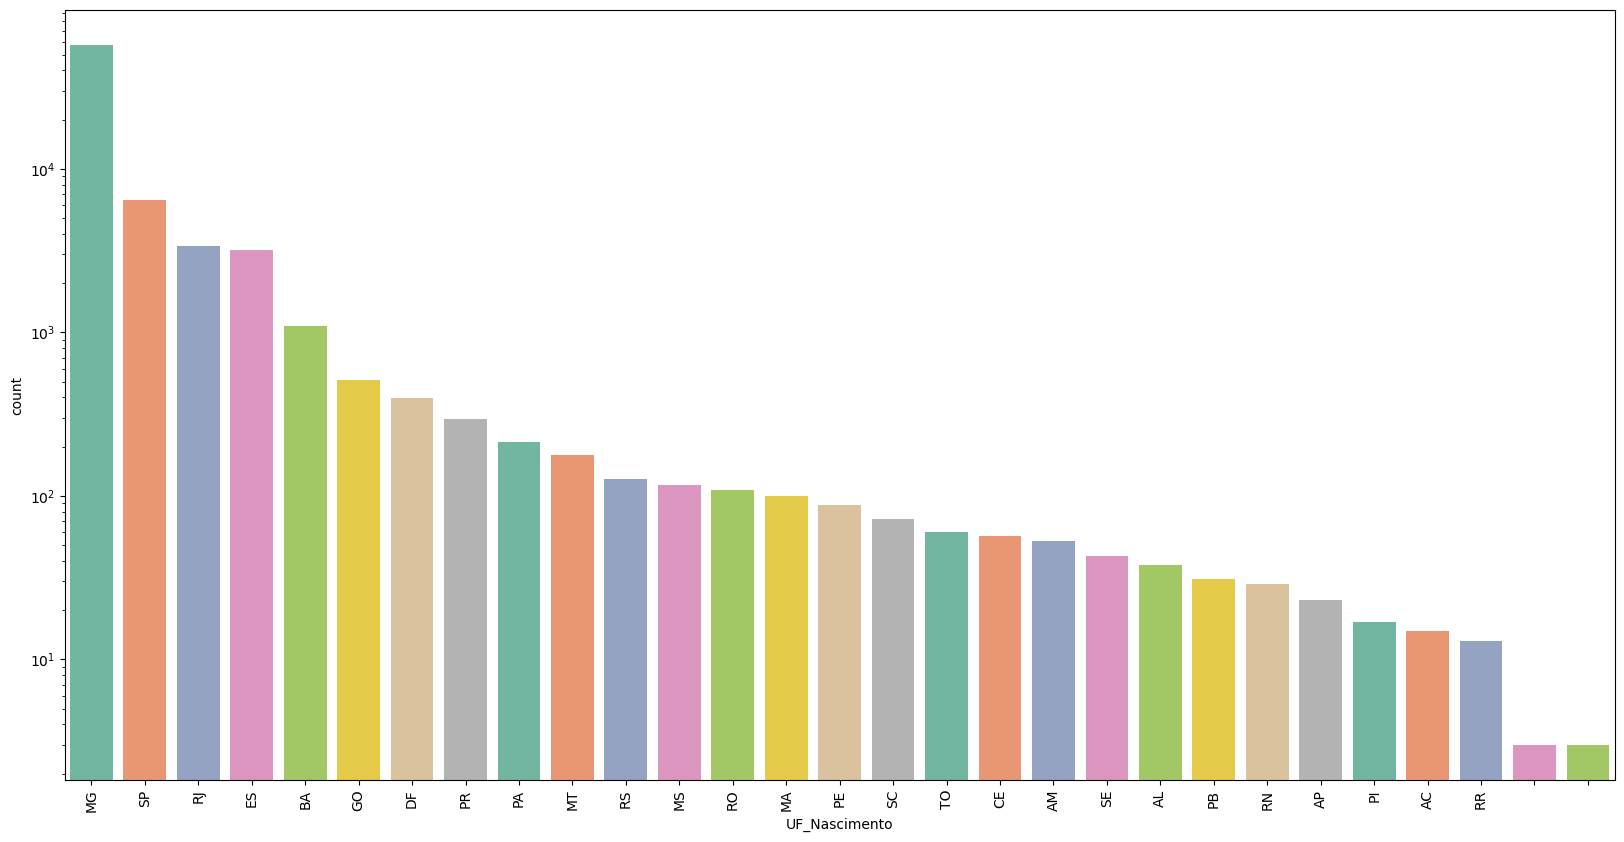

In [677]:
ucp = sns.countplot(x=df['UF_Nascimento'], color='red', data=df, order=df['UF_Nascimento'].value_counts().index, orient='v', palette='Set2')
ucp.set_xticklabels(ucp.get_xticklabels(), rotation=90)
ucp.figure.set_size_inches(20, 10)
ucp.set_yscale('log')

In [678]:
df[df['UF_Nascimento'].isnull()]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
43391,114475,1987,M,CAV,1121,CAV - Zootecnia,NaN,Barbados,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,6,Preto(a),55.9
43450,114476,1993,F,CAV,1116,CAV - Medicina Veterinária,NaN,La Ceiba - Atlántida,2015/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,9,Indígena,65.6
44186,114478,1994,M,CAV,1126,CAV - Bioquímica,NaN,Benguela - Lobito,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,10,Preto(a),40.4
50037,30006018,1990,M,CRP,3101,CRP - Administração - Integral,NaN,NaN,2016/1,2016/1,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,0,Informação não disponível,NaN
50736,134043,1994,M,CAV,1117,CAV - Nutrição,NaN,Benguela - Lobito,2016/2,2021/1,A,Abandono ...,Evasão,0.0,NaN,11,Preto(a),56.9
50740,134044,1987,M,CAV,1116,CAV - Medicina Veterinária,NaN,Barbados,2016/2,2019/1,D,Desligamento ...,Evasão,0.0,NaN,18,Preto(a),32.8
52448,138978,1995,F,CAV,1116,CAV - Medicina Veterinária,NaN,Managua,2017/1,0,N,Normal ...,Retenção,0.0,NaN,11,Amarelo(a),68.1
52759,138980,1994,F,CAV,1129,CAV - Comunicação Social,NaN,Bohicon,2017/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,1,Preto(a),78.1
56591,145912,1999,F,CAV,1126,CAV - Bioquímica,NaN,Pedro Juan Caballero,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,6,Amarelo(a),6.2
56870,147738,1990,F,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0


##### Foi verificado que os alunos que não possuem UF de nascimento são alunos estrangeiros ou que não informaram o município de nascimento
##### Será substituído o valor nulo por 'N/A'

In [679]:
df['UF_Nascimento'].fillna('N/A', inplace=True)
print(f"Quantidade de valores nulos: {df['UF_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 0


#### Valores irrelevantes
    - Tratamento de valores irrelevantes


In [680]:
df['UF_Nascimento'].value_counts().reset_index().rename(columns={'index': 'UF_Nascimento', 'UF_Nascimento': 'Quantidade'}).query('Quantidade < 12')

,UF_Nascimento,Quantidade
28,,3
29,,3


In [681]:
df[df['UF_Nascimento'].map(df['UF_Nascimento'].value_counts()) == 3]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
604,35371,1978,M,CAV,1113,CAV - Engenharia Florestal,,ATHENS,2000/1,2004/2,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,77.3
1060,29527,1980,M,CAV,1116,CAV - Medicina Veterinária,,LEON,2000/1,2002/1,T,Transferência ...,Evasão,NaN,NaN,0,Informação não disponível,74.3
1267,29358,1990,M,CAV,1122,CAV - Ciências Biológicas,,São Paulo,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,6,Informação não disponível,0.0
26274,30000973,1987,F,CRP,3110,CRP - Ciências Biológicas,,"PLYMOUTH, MASSACHUSETS",2010/1,2012/2,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,8,Branco(a),33.4
70014,30009688,2001,M,CRP,3107,CRP - Química,,Nagóia,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,9.0,609.34,1,Informação não disponível,58.5
70054,30009864,2002,F,CRP,3111,CRP - Engenharia de Produção,,Viçosa,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,3.0,644.30,0,Informação não disponível,0.0


##### Foi verificado que alguns alunos possuem UF de nascimento vazio
##### Será substituído o valor vazio por 'N/A'

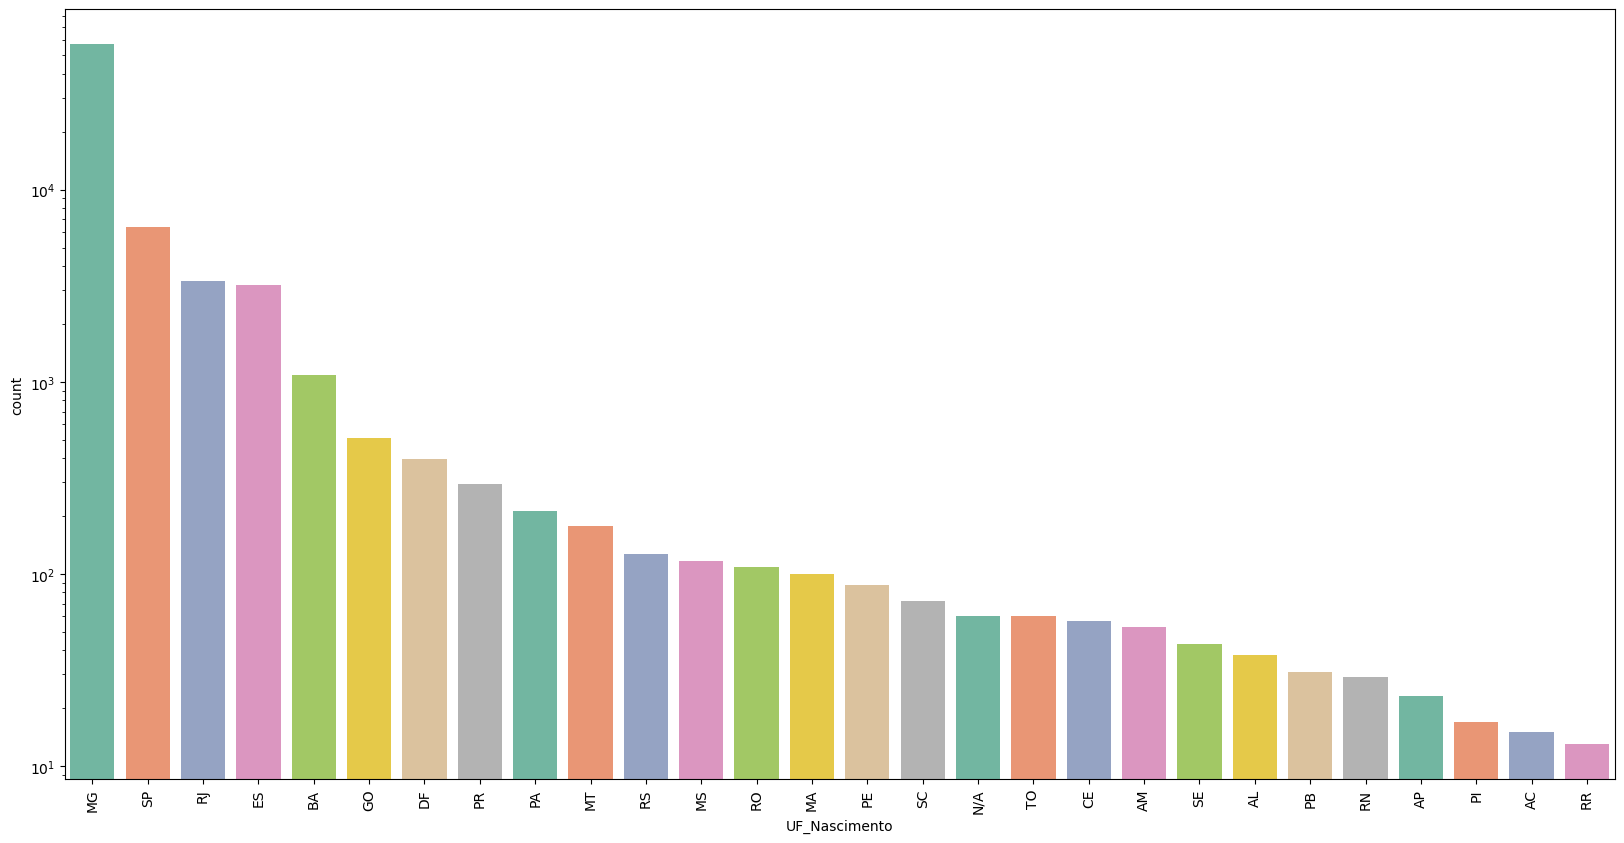

In [682]:
df.loc[df['UF_Nascimento'].map(df['UF_Nascimento'].value_counts()) == 3, 'UF_Nascimento'] = 'N/A'

ucp = sns.countplot(x=df['UF_Nascimento'], color='red', data=df, order=df['UF_Nascimento'].value_counts().index, orient='v', palette='Set2')
ucp.set_xticklabels(ucp.get_xticklabels(), rotation=90)
ucp.figure.set_size_inches(20, 10)
ucp.set_yscale('log')

In [683]:
df

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74021,172112,1996,N/A,CAV,1153,CAV - Bacharelado em Educação Física,N/A,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,0.0
74022,172110,1995,N/A,CAV,1153,CAV - Bacharelado em Educação Física,N/A,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74023,172113,1996,N/A,CAV,1153,CAV - Bacharelado em Educação Física,N/A,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74024,172114,1998,N/A,CAV,1153,CAV - Bacharelado em Educação Física,N/A,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
